# LogGabor user guide


Table of content
----------------

* [What is the LogGabor package?](LogGabor.ipynb#What-is-the-LogGabor-package?) 

* [Installing](LogGabor.ipynb#Install) 

* [Importing the library](LogGabor.ipynb#Importing-the-library)

* [Properties of log-Gabor filters](LogGabor.ipynb#Properties-of-log-Gabor-filters)

* [Testing filter generation](LogGabor_testing-filter-generation.ipynb) 

* [Testing on a sample image](LogGabor.ipynb#Testing-on-a-sample-image) 

* [Building a pyramid](LogGabor_making-a-pyramid.ipynb) 

* [An example of fitting images with log-Gabor filters](LogGabor_fit-example.ipynb) 

## Importing the library

In [1]:
%load_ext autoreload
%autoreload 2
from LogGabor import LogGabor
parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
lg = LogGabor(parameterfile)
lg.set_size((32, 32))

To install the dependencies related to running this notebook, see [Installing notebook dependencies](#Installing-notebook-dependencies).

[Back to top](#LogGabor-user-guide)

In [2]:
import os
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid


Defining a reference log-gabor  (look in the corners!)

initial_guess : [15, 8, 0.26179938779914935, 0.12435117250106024] , idx : (15, 8, 13, 3)
popt : [ 14.602  8.558  0.210  0.101] , true :  14.6 8.5 0.20943951023931953 0.1


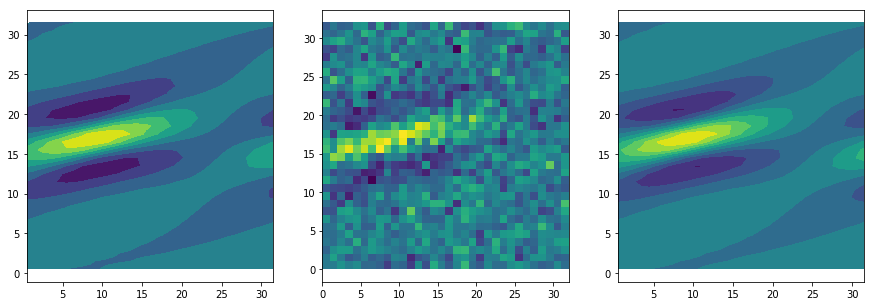

In [3]:
def twoD_Gaussian(xy, x_pos, y_pos, theta, sf_0):
    FT_lg = lg.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=lg.pe.B_sf, theta=theta, B_theta=lg.pe.B_theta)
    return lg.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(lg.pe.N_X)
y = np.arange(lg.pe.N_Y)
x, y = xy =  np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 14.6, 8.5, 12 * np.pi / 180., .1
data = twoD_Gaussian(xy, x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
#plt.figure()
#plt.imshow(data.reshape(lg.pe.N_X, lg.pe.N_Y))
#plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data /= np.abs(data).max()
data_noisy = data + .25*np.random.normal(size=data.shape)
# getting best match
C = lg.linear_pyramid(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y))
idx = lg.argmax(C)
initial_guess = [idx[0], idx[1], lg.theta[idx[2]], lg.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

import scipy.optimize as opt

popt, pcov = opt.curve_fit(twoD_Gaussian, xy, data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian(xy, *popt)

extent = (0, lg.pe.N_X, 0, lg.pe.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
_ = axs[0].contourf(data.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
_ = axs[1].imshow(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y), cmap=plt.cm.viridis, extent=extent)
_ = axs[2].contourf(data_fitted.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
for ax in axs: ax.axis('equal')

[Back to top](#LogGabor-user-guide)

## performing a fit

In [4]:
from LogGabor import LogGaborFit
lg = LogGaborFit(parameterfile)
lg.set_size((32, 32))

x_pos, y_pos, theta, sf_0  = 14.6, 8.5, 12 * np.pi / 180., .1
data = lg.invert(lg.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=lg.pe.B_sf, theta=theta, B_theta=lg.pe.B_theta))
data /= np.abs(data).max()
data_noisy = data + .25*np.random.normal(size=data.shape)


data_fitted, params = lg.LogGaborFit(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y))

In [5]:
data_fitted.shape


(32, 32)

In [6]:
params.pretty_print()

Name        Value      Min      Max   Stderr     Vary     Expr Brute_Step
B_sf       0.4322    0.001      inf     None     True     None     None
B_theta     0.176    0.001      inf     None     True     None     None
phase      0.3264     -inf      inf     None     True     None     None
sf_0       0.1001    0.001      inf     None     True     None     None
theta      0.2107   -1.571    1.571     None     True     None     None
x_pos        14.9        0       32     None     True     None     None
y_pos        9.62        0       32     None     True     None     None


params : Parameters([('x_pos', <Parameter 'x_pos', 14.899720962382055, bounds=[0:32]>), ('y_pos', <Parameter 'y_pos', 9.620016306177625, bounds=[0:32]>), ('theta', <Parameter 'theta', 0.21065615830673345, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', 0.10008219472404811, bounds=[0.001:inf]>), ('B_sf', <Parameter 'B_sf', 0.4322000207444586, bounds=[0.001:inf]>), ('B_theta', <Parameter 'B_theta', 0.17597503909767964, bounds=[0.001:inf]>), ('phase', <Parameter 'phase', 0.32635896188537317, bounds=[-inf:inf]>)]) , true :  14.6 8.5 0.20943951023931953 0.1


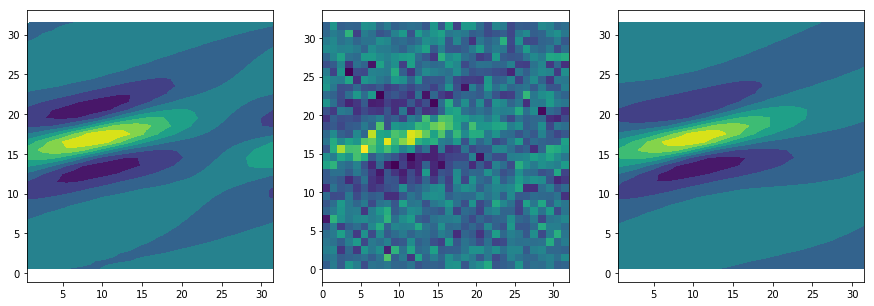

In [7]:
extent = (0, lg.pe.N_X, 0, lg.pe.N_Y)
print ('params :', params, ', true : ', x_pos, y_pos, theta, sf_0)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
_ = axs[0].contourf(data.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
_ = axs[1].imshow(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y), cmap=plt.cm.viridis, extent=extent)
_ = axs[2].contourf(data_fitted.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
for ax in axs: ax.axis('equal')

With periodic boundaries, check that the filter "re-enters" the image from  the other border:

params : Parameters([('x_pos', <Parameter 'x_pos', 14.899721016254318, bounds=[0:32]>), ('y_pos', <Parameter 'y_pos', 9.620016286475257, bounds=[0:32]>), ('theta', <Parameter 'theta', 0.2106561572137966, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', 0.10008219474342883, bounds=[0.001:inf]>), ('B_sf', <Parameter 'B_sf', 0.4322000207444586, bounds=[0.001:inf]>), ('B_theta', <Parameter 'B_theta', 0.17597503909767964, bounds=[0.001:inf]>), ('phase', <Parameter 'phase', 0.3263589931256201, bounds=[-inf:inf]>)]) , true :  14.6 8.5 0.20943951023931953 0.1


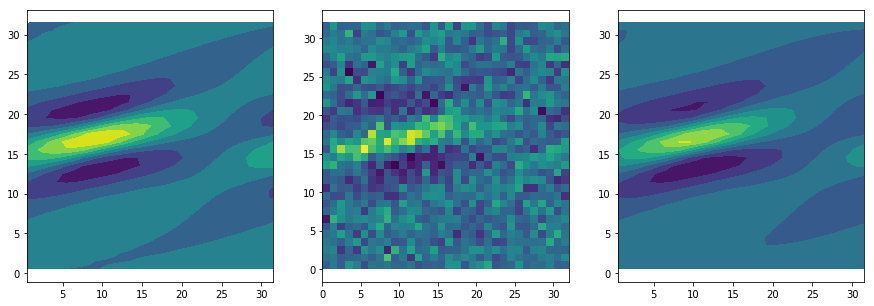

In [8]:
data_fitted, params = lg.LogGaborFit(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y), do_border=False)
extent = (0, lg.pe.N_X, 0, lg.pe.N_Y)
print ('params :', params, ', true : ', x_pos, y_pos, theta, sf_0)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
_ = axs[0].contourf(data.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
_ = axs[1].imshow(data_noisy.reshape(lg.pe.N_X, lg.pe.N_Y), cmap=plt.cm.viridis, extent=extent)
_ = axs[2].contourf(data_fitted.reshape(lg.pe.N_X, lg.pe.N_Y), 8, extent=extent, cmap=plt.cm.viridis, origin='upper')
for ax in axs: ax.axis('equal')

[Back to top](#LogGabor-user-guide)

## TODO: validation of fits

[Back to top](#LogGabor-user-guide)

## more book keeping

In [9]:
%load_ext watermark
%watermark

2018-06-20T17:16:46+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)
system     : Darwin
release    : 17.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit


In [10]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, SLIP, LogGabor

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.4.0
OS Darwin 17.6.0 x86_64 i386 64bit
numpy 1.14.5
scipy 1.1.0
matplotlib 2.2.2
SLIP 20171205
LogGabor 2017-12-05.binder
Wed Jun 20 17:16:46 2018 CEST

[Back to top](#LogGabor-user-guide)
[Back to the LogGabor user guide](LogGabor.ipynb#LogGabor-user-guide)